### 当前有北上广深沈五地空气质量数据，绘制五个城市PM2.5的随时间变化的折线图

In [1]:
import pandas as pd

##### 1. 读取数据

In [27]:
file_paths = ["datasets/weather/BeijingPM20100101_20151231.csv",
              "datasets/weather/GuangzhouPM20100101_20151231.csv",
              "datasets/weather/ShanghaiPM20100101_20151231.csv",
              "datasets/weather/ChengduPM20100101_20151231.csv",
              "datasets/weather/ShenyangPM20100101_20151231.csv"]

city_names = ['北京', '广州', '上海', '成都', '沈阳']

In [28]:
df_list = []

for path in file_paths:
    df = pd.read_csv(path)
    df_list.append(df)

##### 2. 数据预处理

In [29]:
# datetime 作为 index

for df in df_list:
    df['datetime'] = pd.to_datetime(
        df['year'].astype(str)+'-'+df['month'].astype(str)+'-'+df['day'].astype(str)+' '+df['hour'].astype(str)+':00:00')
    df.set_index('datetime', inplace=True)

In [30]:
df_list[0].head()

No  year  month  day  hour  season  PM_Dongsi  \
datetime                                                             
2010-01-01 00:00:00   1  2010      1    1     0       4        NaN   
2010-01-01 01:00:00   2  2010      1    1     1       4        NaN   
2010-01-01 02:00:00   3  2010      1    1     2       4        NaN   
2010-01-01 03:00:00   4  2010      1    1     3       4        NaN   
2010-01-01 04:00:00   5  2010      1    1     4       4        NaN   

                     PM_Dongsihuan  PM_Nongzhanguan  PM_US Post  DEWP  HUMI  \
datetime                                                                      
2010-01-01 00:00:00            NaN              NaN         NaN -21.0  43.0   
2010-01-01 01:00:00            NaN              NaN         NaN -21.0  47.0   
2010-01-01 02:00:00            NaN              NaN         NaN -21.0  43.0   
2010-01-01 03:00:00            NaN              NaN         NaN -21.0  55.0   
2010-01-01 04:00:00            NaN              NaN         NaN -20.0  51.0   

                       PRES  TEMP cbwd    Iws  precipitation  Iprec  
datetime                                                             
2010-01-01 00:00:00  1021.0 -11.0   NW   1.79            0.0    0.0  
2010-01-01 01:00:00  1020.0 -12.0   NW   4.92            0.0    0.0  
2010-01-01 02:00:00  1019.0 -11.0   NW   6.71            0.0    0.0  
2010-01-01 03:00:00  1019.0 -14.0   NW   9.84            0.0    0.0  
2010-01-01 04:00:00  1018.0 -12.0   NW  12.97            0.0    0.0

In [31]:
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2010-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               52584 non-null  int64  
 1   year             52584 non-null  int64  
 2   month            52584 non-null  int64  
 3   day              52584 non-null  int64  
 4   hour             52584 non-null  int64  
 5   season           52584 non-null  int64  
 6   PM_Dongsi        25052 non-null  float64
 7   PM_Dongsihuan    20508 non-null  float64
 8   PM_Nongzhanguan  24931 non-null  float64
 9   PM_US Post       50387 non-null  float64
 10  DEWP             52579 non-null  float64
 11  HUMI             52245 non-null  float64
 12  PRES             52245 non-null  float64
 13  TEMP             52579 non-null  float64
 14  cbwd             52579 non-null  object 
 15  Iws              52579 non-null  float64
 16  precipitation    52100 

In [32]:
# 删除缺失数据
# 原则：删除PM列均空的

for i, df in enumerate(df_list):
    df = df.dropna(how='all', subset=df.columns[df.columns.str.startswith('PM')])
    df_list[i] = df

In [34]:
df_list[3].head()

No  year  month  day  hour  season  PM_Caotangsi  \
datetime                                                                   
2012-05-14 14:00:00  20751  2012      5   14    14       1           NaN   
2012-06-04 23:00:00  21264  2012      6    4    23       2           NaN   
2012-06-05 15:00:00  21280  2012      6    5    15       2           NaN   
2012-06-05 16:00:00  21281  2012      6    5    16       2           NaN   
2012-06-05 17:00:00  21282  2012      6    5    17       2           NaN   

                     PM_Shahepu  PM_US Post  DEWP   HUMI    PRES  TEMP cbwd  \
datetime                                                                      
2012-05-14 14:00:00         NaN        46.0   4.0  24.24  1013.9  26.0   cv   
2012-06-04 23:00:00         NaN        69.0  18.0  88.28  1008.1  20.0   cv   
2012-06-05 15:00:00         NaN        98.0  19.0  88.37  1004.1  21.0   cv   
2012-06-05 16:00:00         NaN        89.0  20.0  83.25  1003.1  23.0   cv   
2012-06-05 17:00:00         NaN        66.0  18.0  73.50  1003.1  23.0   NE   

                     Iws  precipitation  Iprec  
datetime                                        
2012-05-14 14:00:00  2.0            0.0    0.0  
2012-06-04 23:00:00  4.0            0.0    0.0  
2012-06-05 15:00:00  4.0            0.0    0.0  
2012-06-05 16:00:00  4.0            0.0    0.0  
2012-06-05 17:00:00  2.0            0.0    0.0

##### 3. 绘图

In [35]:
from matplotlib import pyplot as plt
from matplotlib import font_manager

###### 准备数据

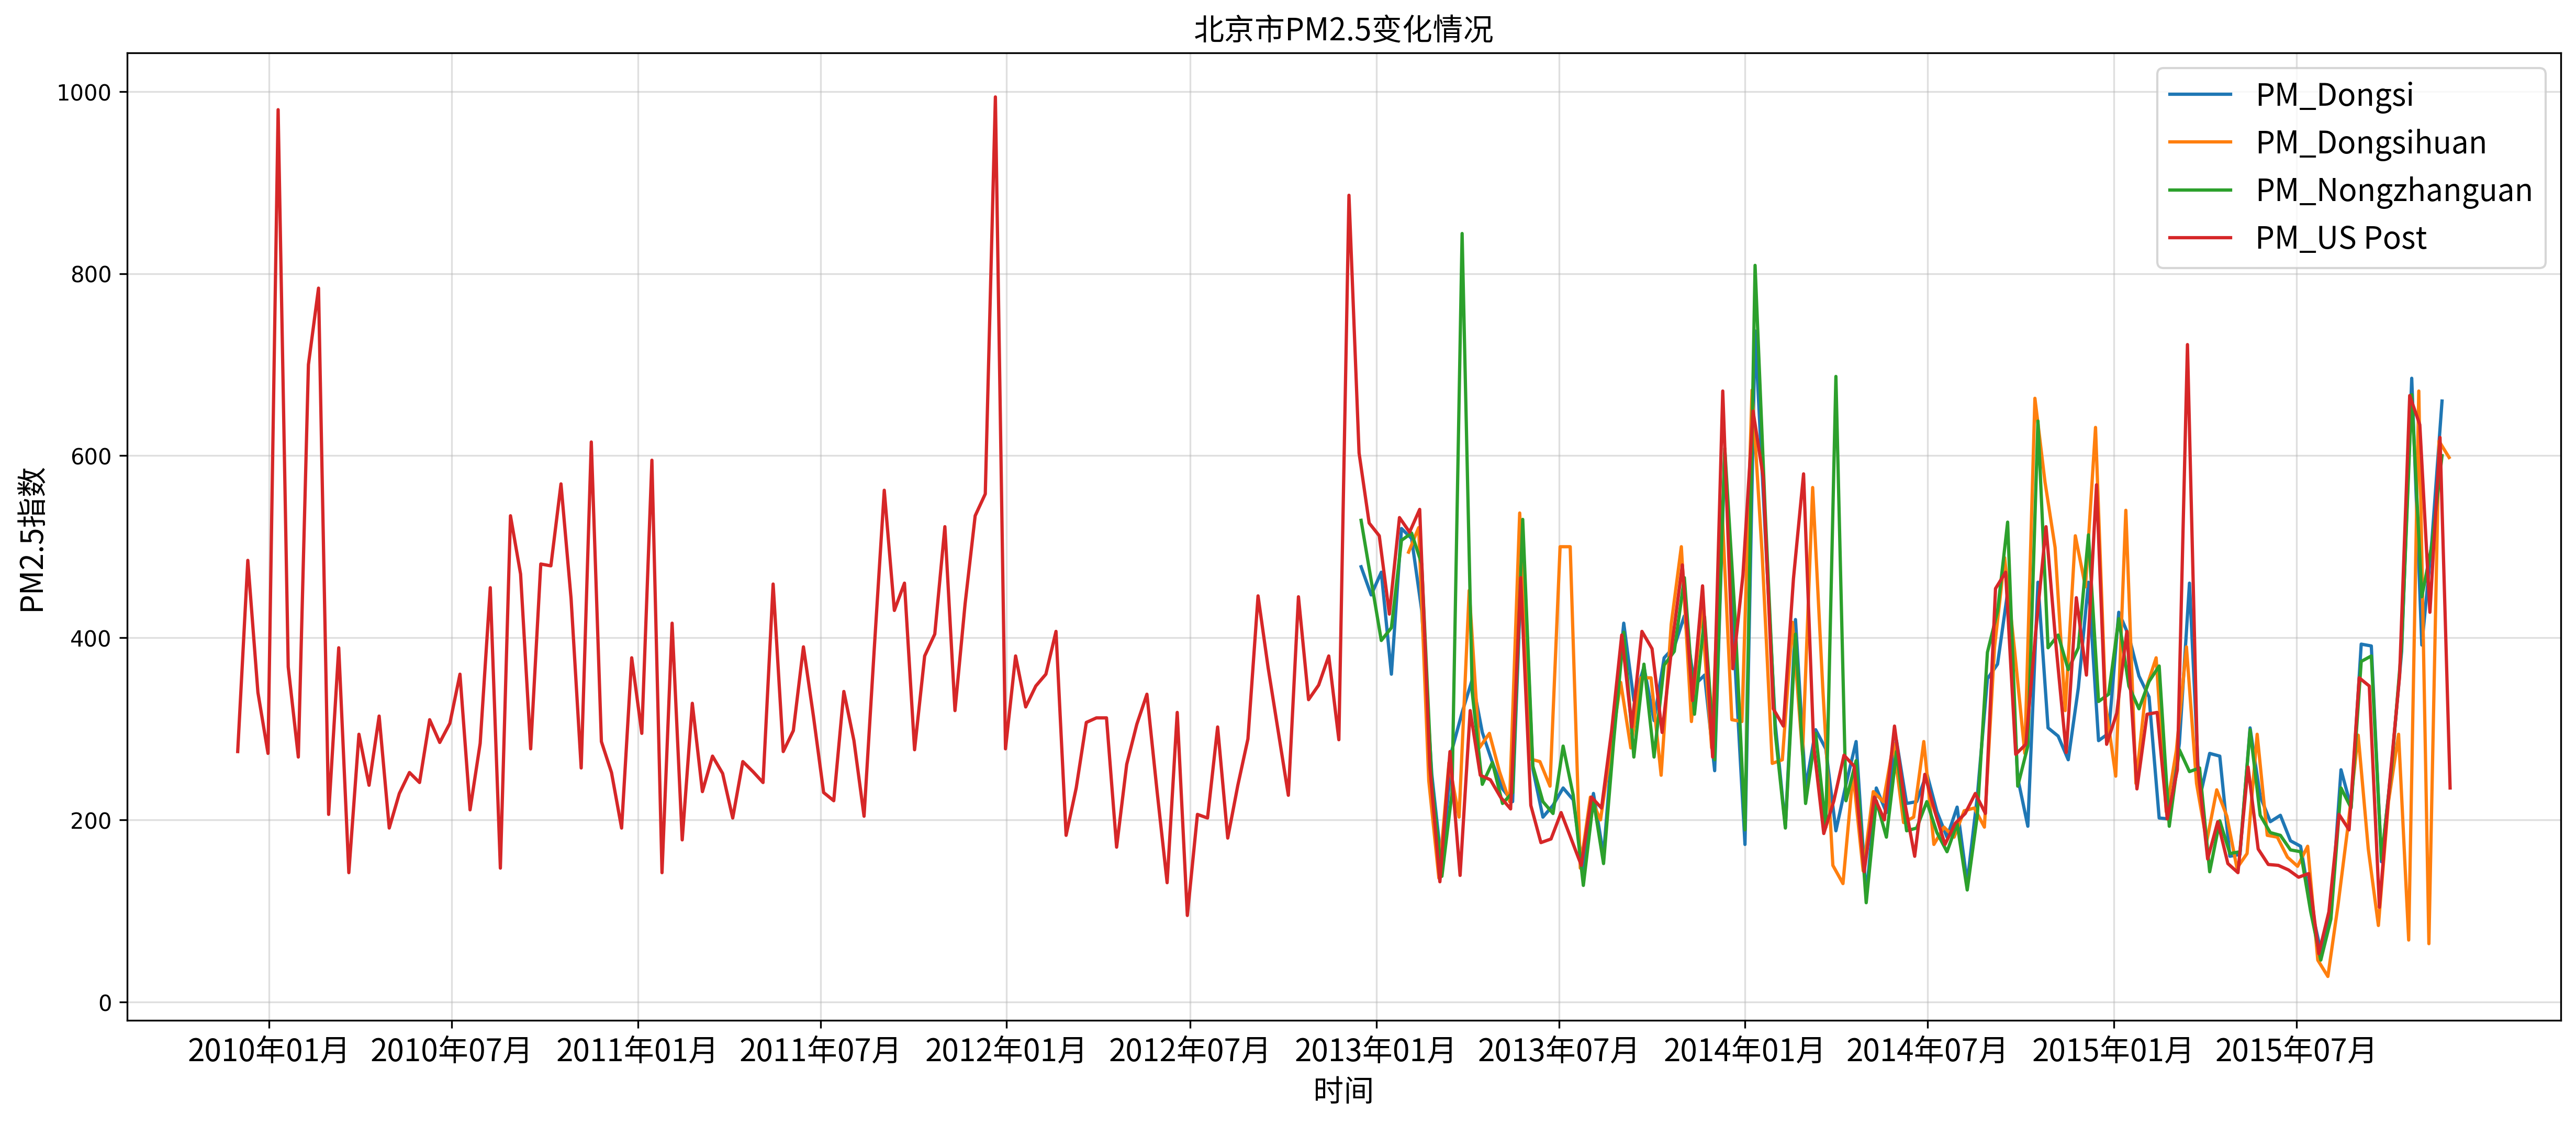

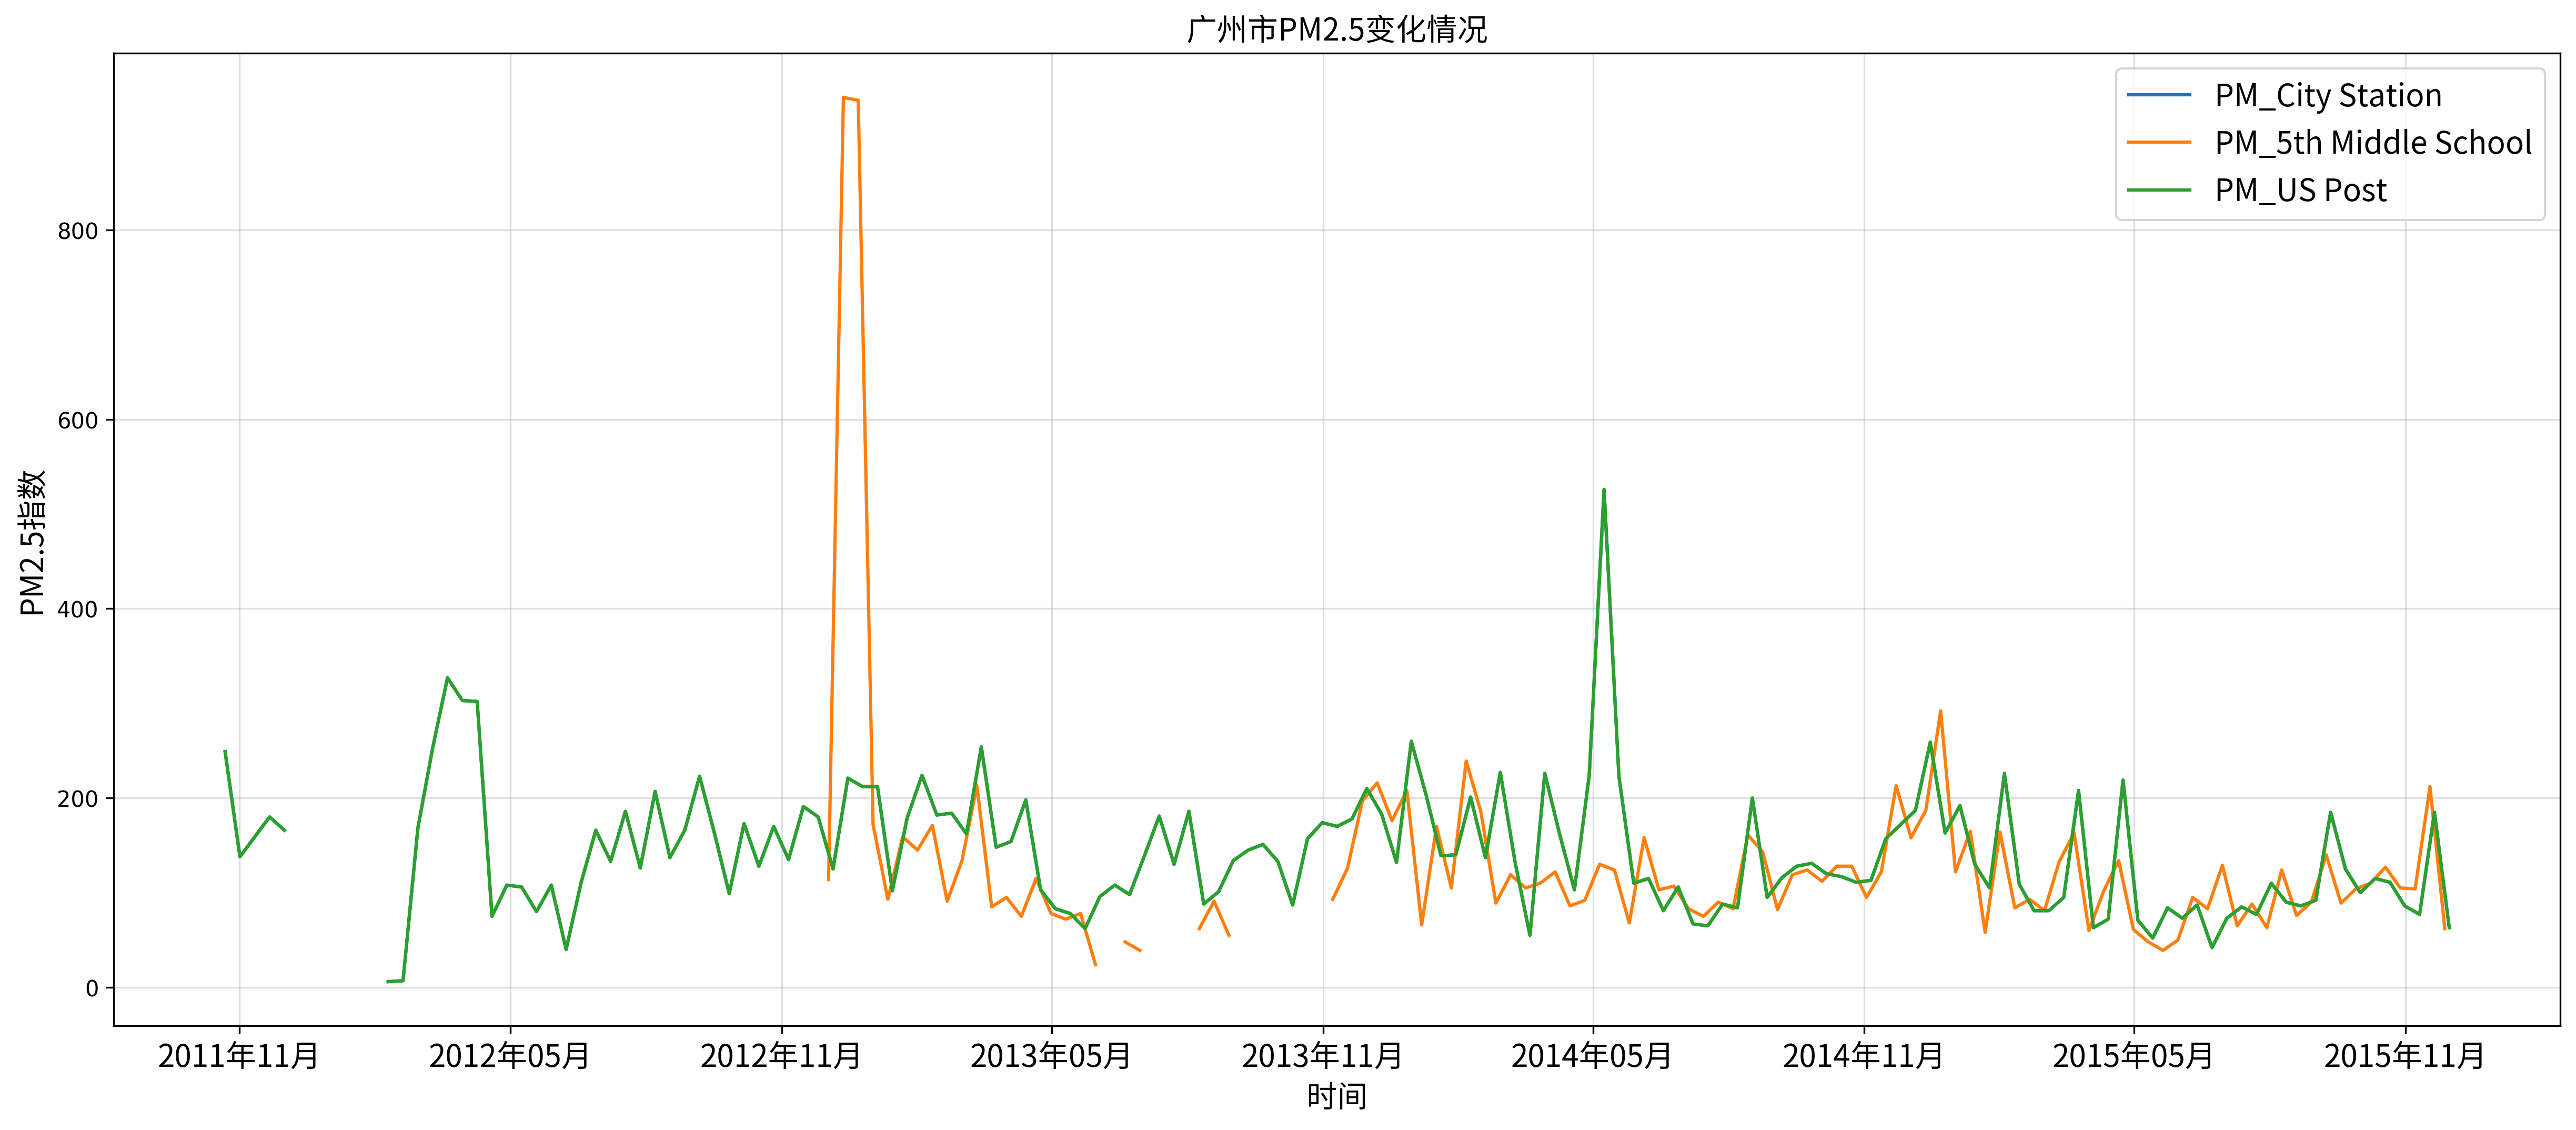

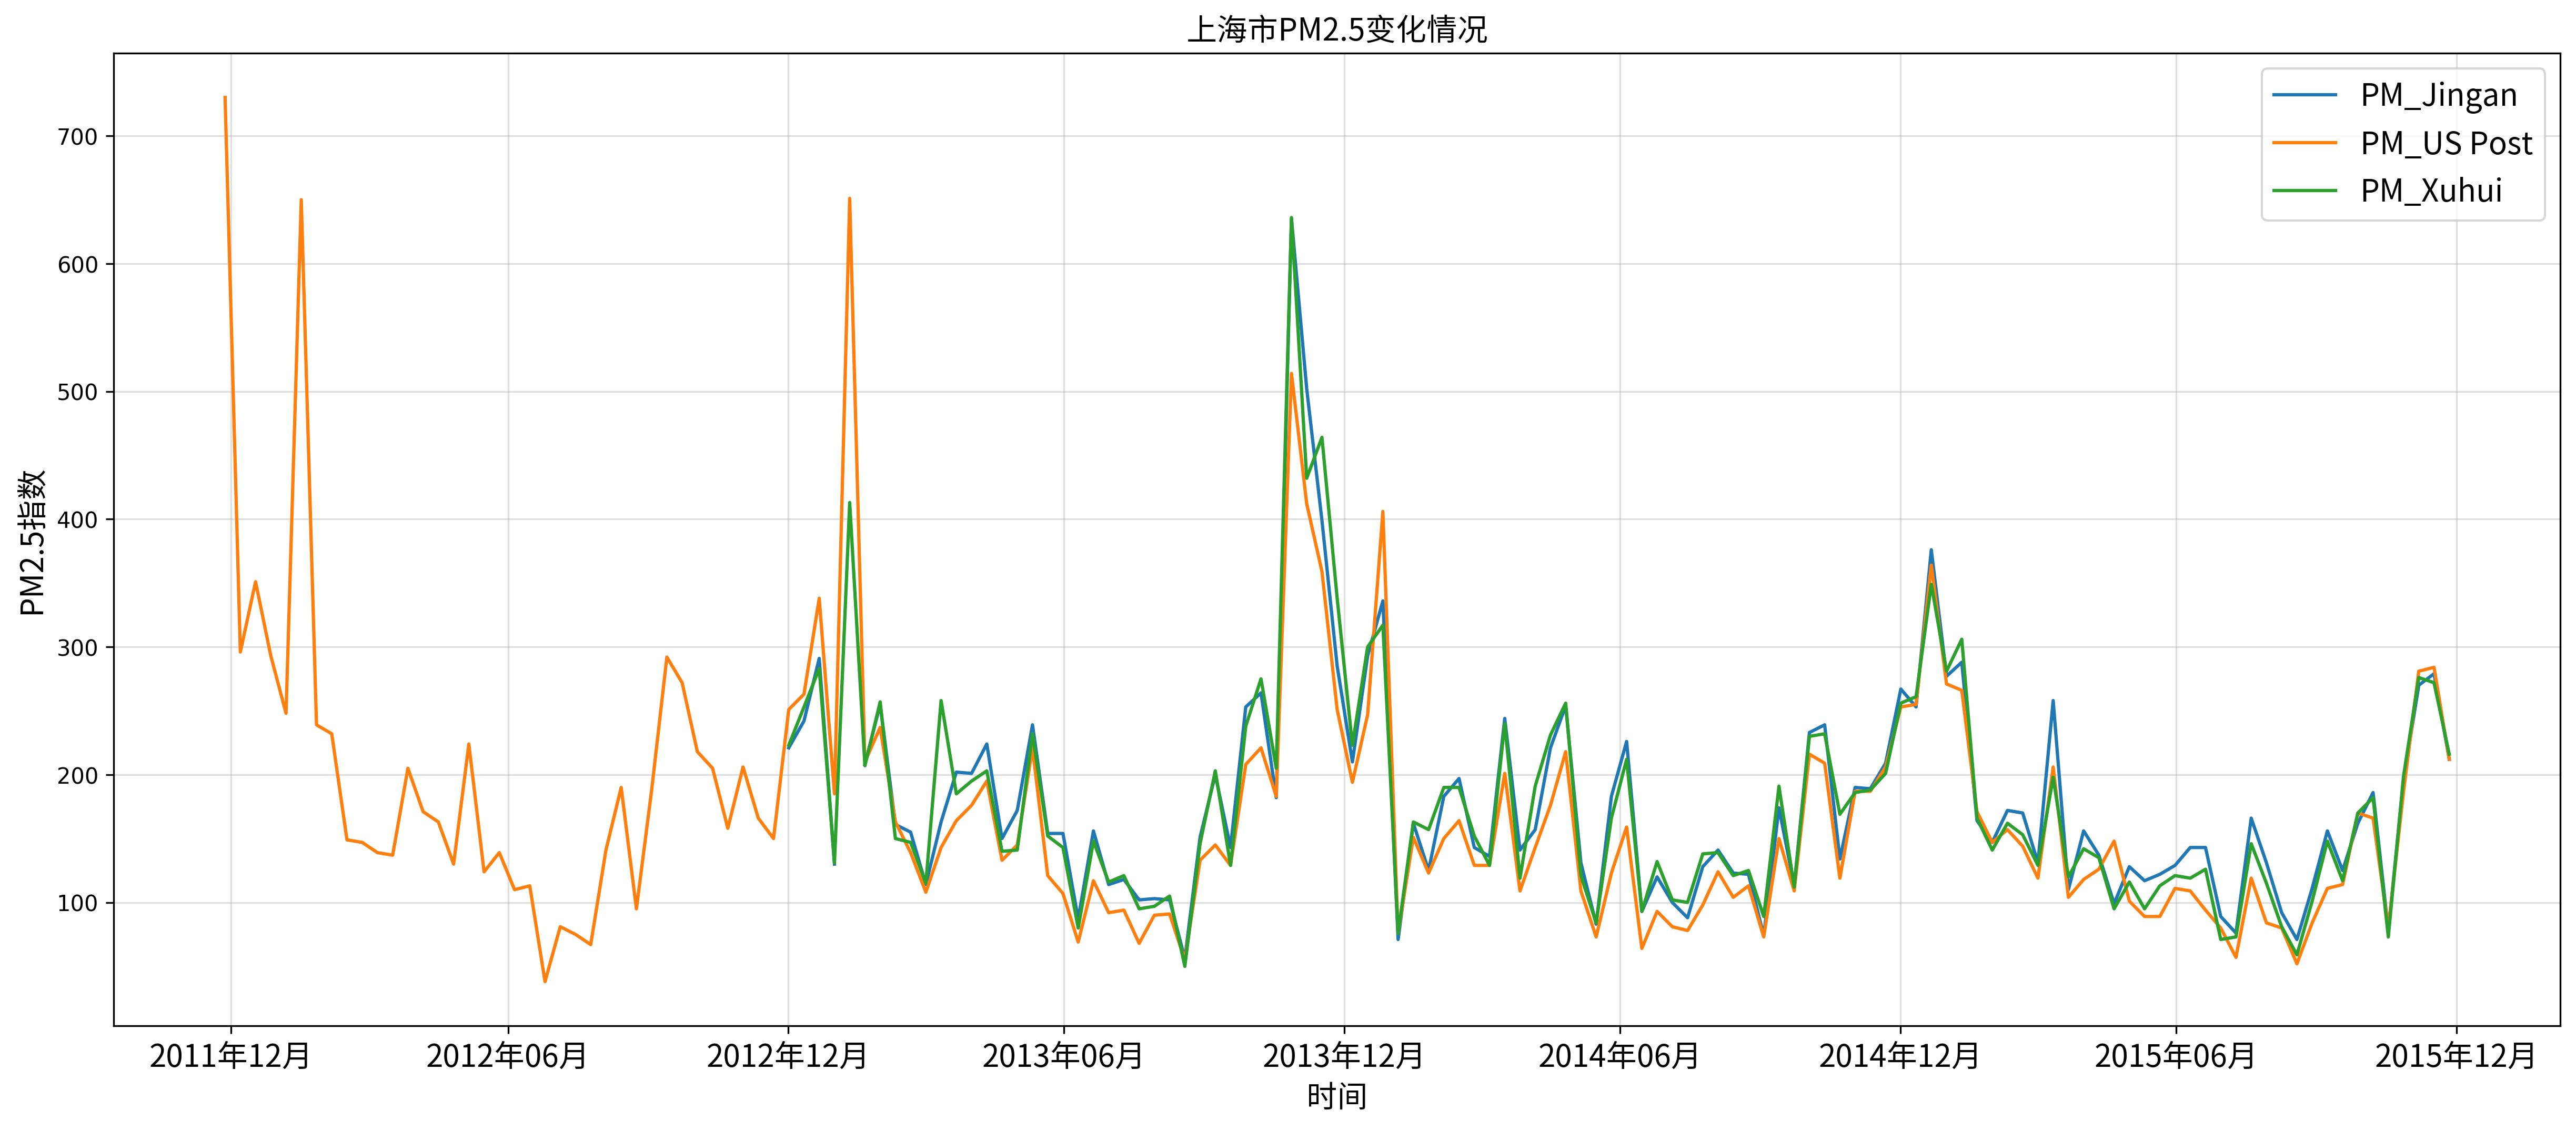

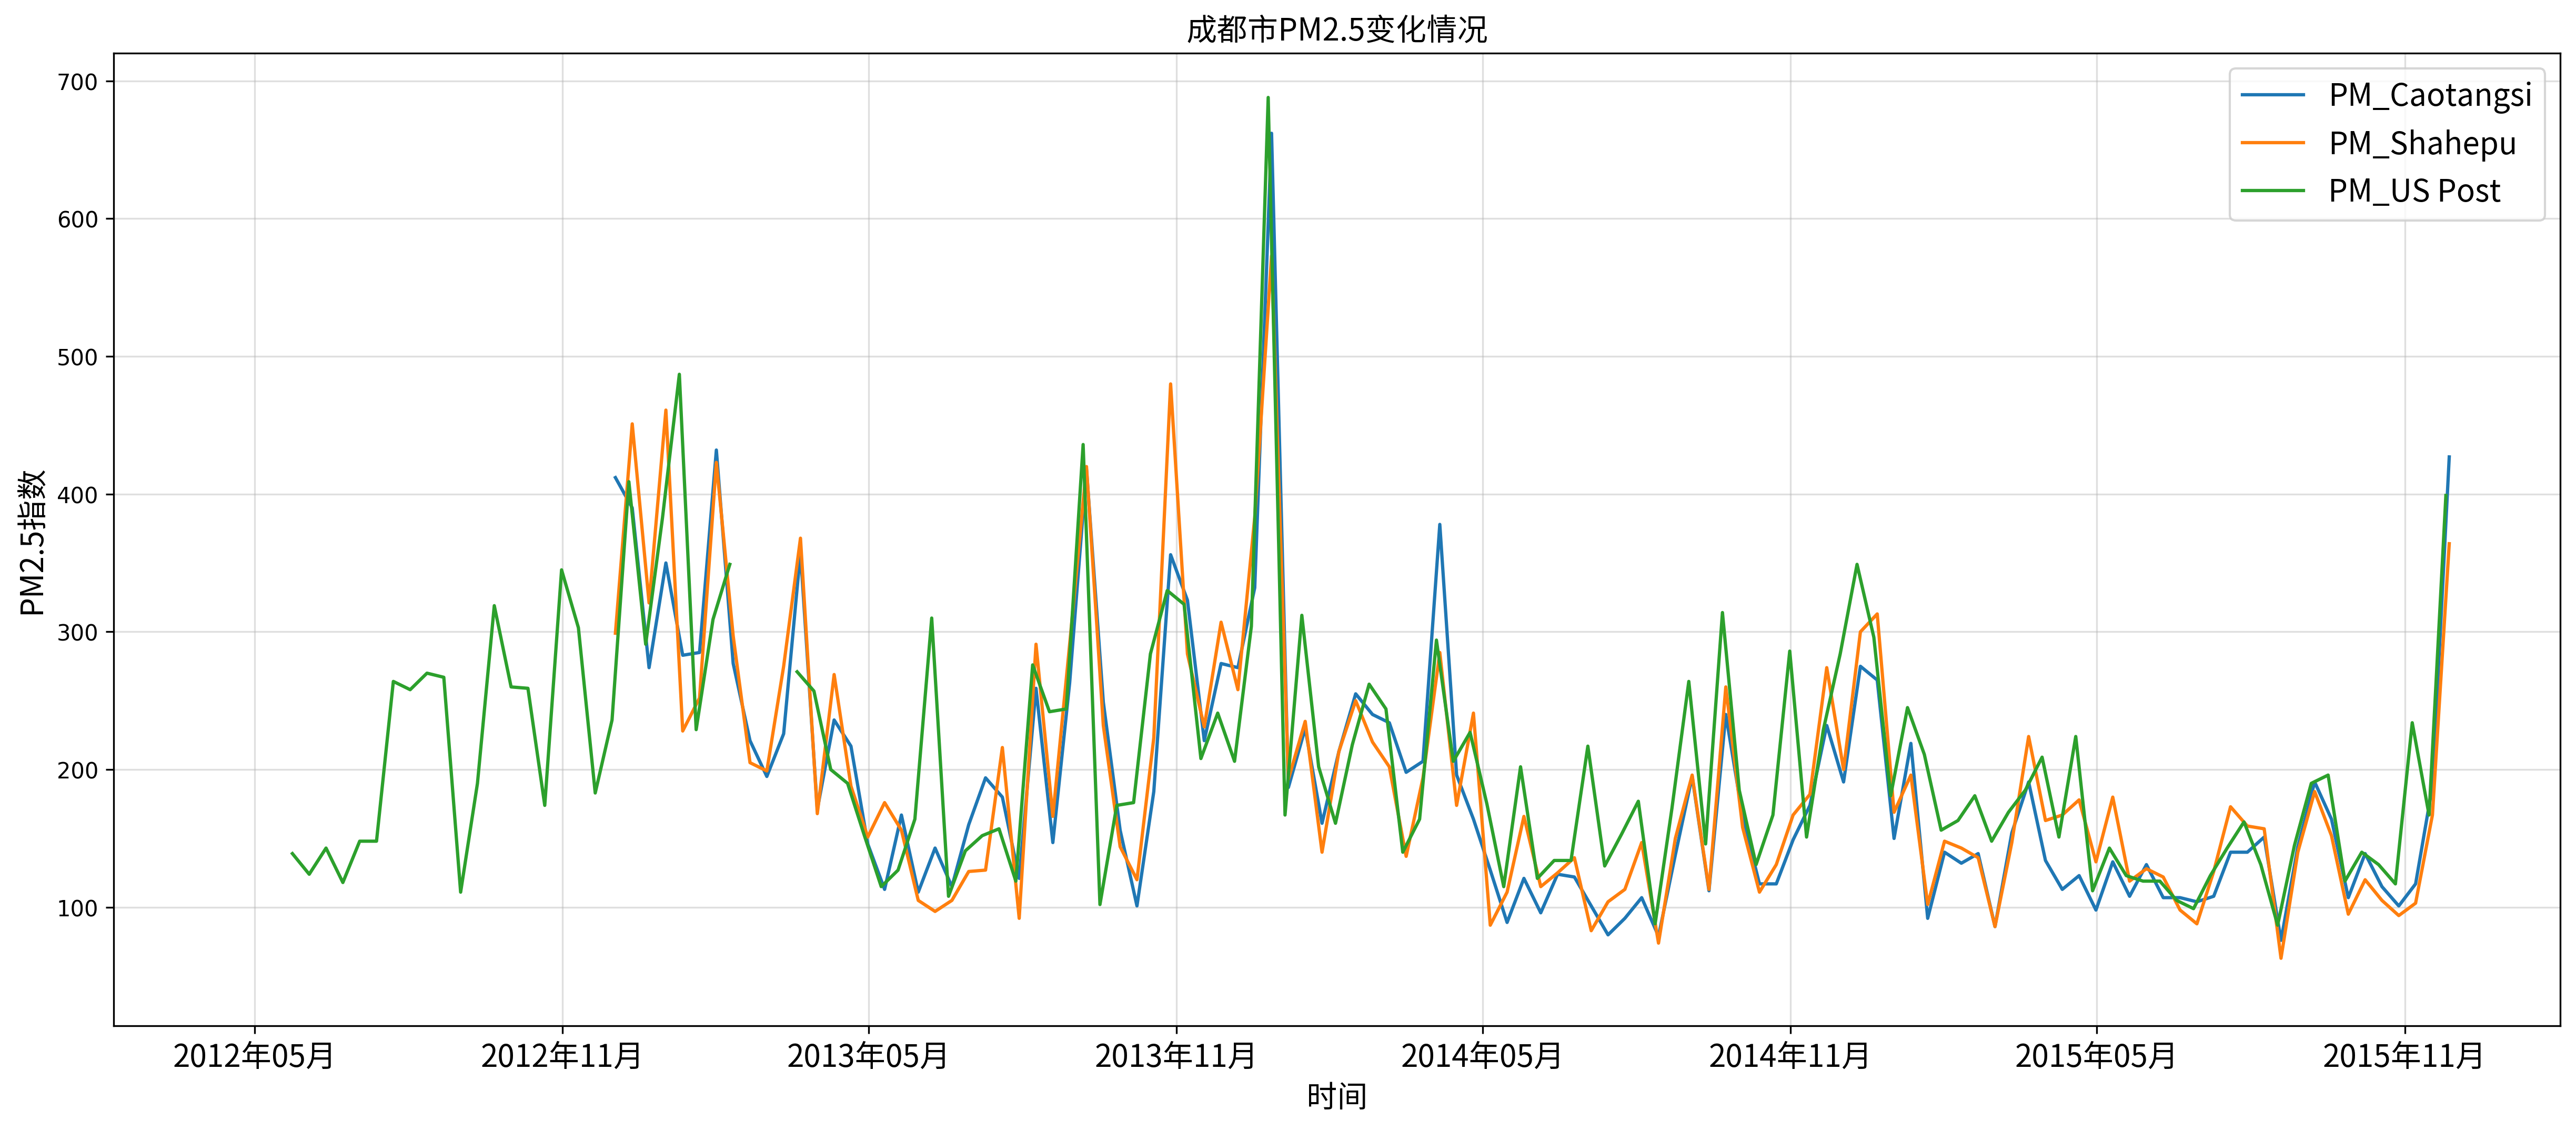

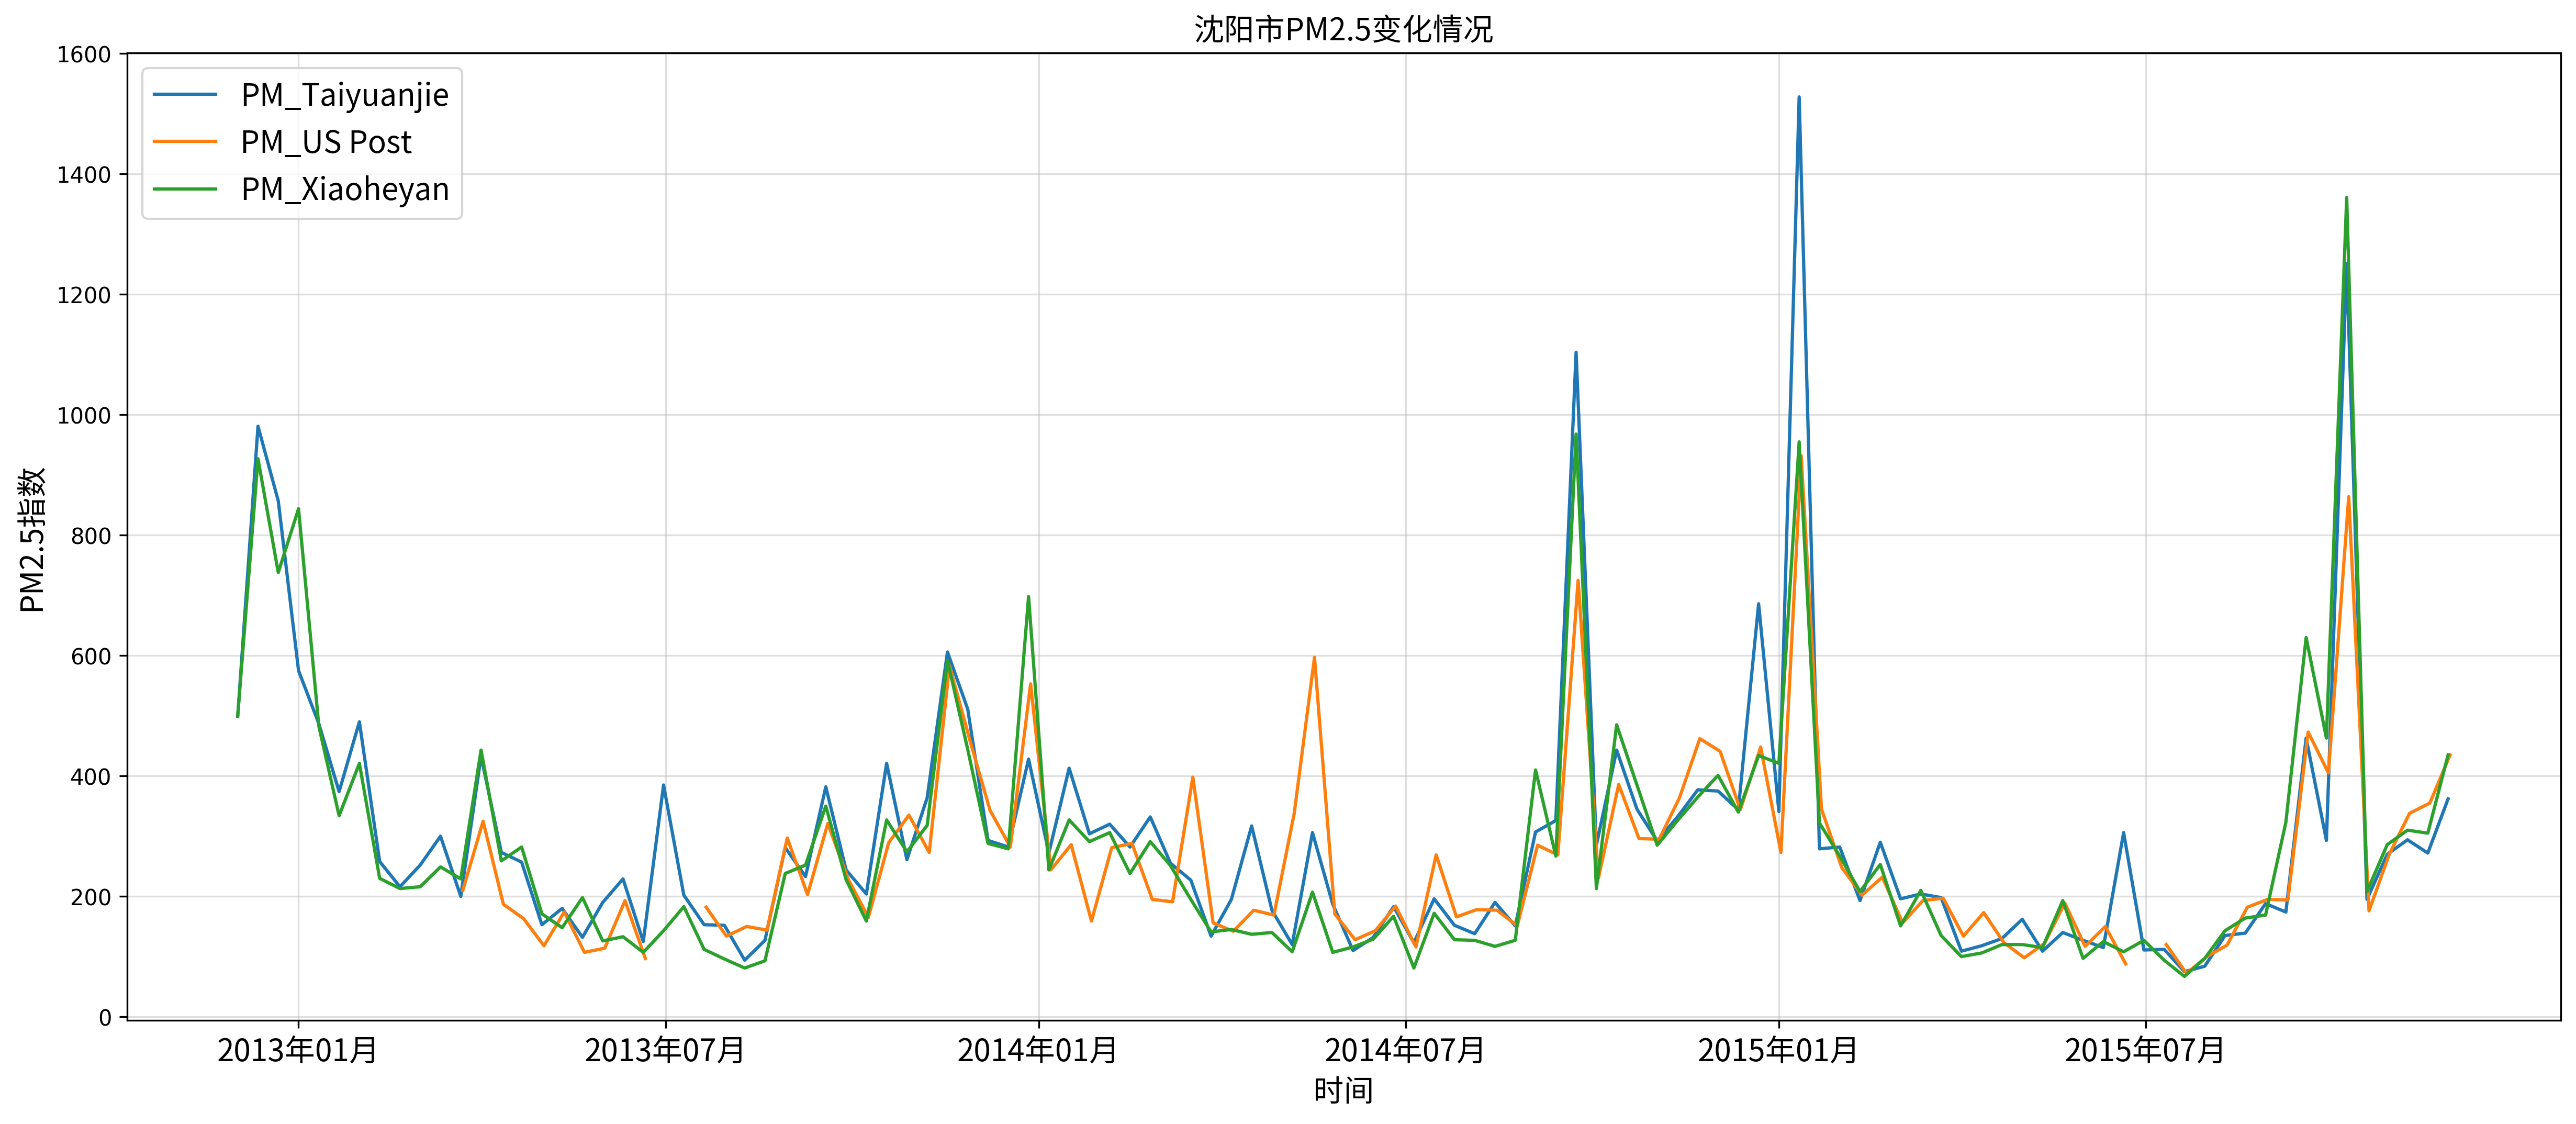

In [64]:
# df = df_list[0]

for i, df in enumerate(df_list):
    city_name = city_names[i]
    
    plt.figure(figsize=(20, 8), dpi=300)
    my_font = font_manager.FontProperties(family='Source Han Sans CN',
                                          size=14)
    plt.xlabel("时间", fontproperties=my_font)
    plt.ylabel("PM2.5指数", fontproperties=my_font)
    plt.title(f"{city_name}市PM2.5变化情况", fontproperties=my_font)
    plt.grid(alpha=0.4)     # alpha设置不透明度
    
    PM_cols = df.columns[df.columns.str.startswith('PM')].to_list()
    # PM_col = PM_cols[0]
    for PM_col in PM_cols:
        col_series : pd.Series = df[PM_col]
        col_series.dropna(inplace=True)
        col_series = col_series.resample('10D').max()
        _x = pd.to_datetime(col_series.index)
        _y = col_series.values
        plt.plot(_x, _y, label=PM_col)
        
    date_earliest = df.index[0]
    date_latest = df.index[-1]
    xticks_datetime = pd.date_range(start=date_earliest, end=date_latest, freq='6ME')
    
    plt.xticks(xticks_datetime, xticks_datetime.strftime('%Y年%m月'), fontproperties=my_font)
    
    plt.legend(prop=my_font)
    
    plt.savefig(f'output_weather/{city_name}.png')
